In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import scipy
from sklearn.model_selection import train_test_split

In [2]:
import torch

In [53]:
import torch 
import torchvision 
import torch.nn as nn 
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as dsets 
from torch.autograd import Variable 
from torch.utils.data import Dataset, DataLoader

In [4]:
#pip install torchviz

In [5]:
import torchviz

In [6]:
import gc

In [7]:
gc.collect()

0

In [8]:
from sklearn.datasets import make_classification

In [9]:
X, Y = make_classification(
    n_features=4, n_redundant=0, n_informative=3, n_clusters_per_class=2, n_classes=3
)

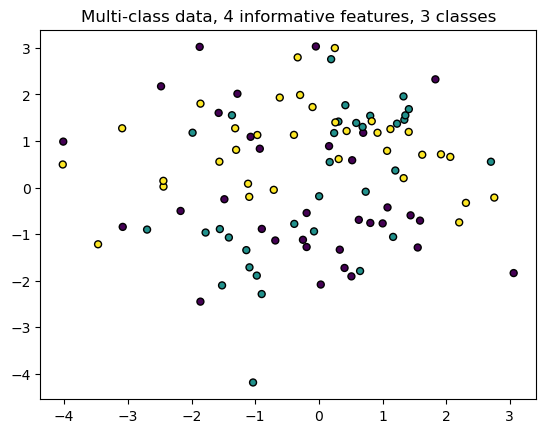

In [10]:
import matplotlib.pyplot as plt
plt.title("Multi-class data, 4 informative features, 3 classes", fontsize="large")
plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=25, edgecolor="k")

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [26]:
Y_test = torch.from_numpy(X_test)
Y_test = torch.from_numpy(np.asarray(Y_test))

In [96]:
x = torch.from_numpy(np.asarray(X))
y = torch.from_numpy(np.asarray(Y))

In [ ]:
nX = torch.randn(5)
nH = torch.randn(2)
nY = torch.randn(4)
nS = torch.randn(3)
nX = Variable(nX)
nH = Variable(nH, requires_grad=True)
nY = Variable(nY, requires_grad=True)
nS = Variable(nS, requires_grad=True)

In [45]:
print(nY)

tensor([-0.0720,  1.9956,  0.3978,  0.3073], requires_grad=True)


In [76]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [77]:
#class NeuralNetwork(nn.Module):
#    def __init__(self):
#        super().__init__()
#        self.flatten = nn.Flatten()
#        self.linear_relu_stack = nn.Sequential(
#            nn.Linear(nX, nH),
#            nn.ReLU(),
#            nn.Linear(nH, nY),
#            nn.ReLU(),
#            nn.Linear(nY, nS),
#        )

#    def forward(self, x):
#        x = self.flatten(x)
#        logits = self.linear_relu_stack(x)
#        return logits

In [78]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [79]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [80]:
#class Net(nn.Module):
#   def __init__(self, nX,nH,nY,nS):
#        super().__init__() # успадковуємо всі властивості + додаємо своє
#        self.main = nn.Sequential
#        self.layer1 = nn.Linear(nX, nH)   # перший шар
#        self.relu = nn.ReLU() 
#        self.layer2 = nn.Linear(nH, nY)   # другий шар
#        self.relu = nn.ReLU()
#        self.layer3 = nn.Linear(nY, nS)    # выхідний шар
#        self.softmax = nn.Softmax(dim=3)       # функція активації Softmax
        

#    def forward(self, x): # Тут ми прописуємо принципи, за якими дані проходитимуть через мережу
#        out = self.layer1(x)  # вихід першого шару
#        out = self.relu(out) # застосовуємо функцію активації до виходу першого шару
#        out = self.layer2(out) # застосовуємо функцію активації до виходу першого шару
#        out = self.relu(out) 
#        out = self.layer3(out)
#        out = self.softmax(out) # застосовуємо функцію активації до другого шару
#        return outputs
        

#model = Net(nX,nH,nY,nS) # Створюємо об'єкт нашої повної мережі

In [81]:
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [82]:
criterion = nn.MSELoss() # Функція помилки (середньо-квадратичне відхилення)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) 
losses = [] # тут буде додаватись середня похибка. Список будемо використовувати для побудови графіка
model.train() # перехід у режим навчання (опціонально)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [83]:
numClasses = 3
numEpochs = 7
learningRate = 0.001 
hidden = 500

In [107]:
x.view(-1, 20*20).shape

torch.Size([1, 400])

In [108]:
model.train()

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [109]:
x.view(-1, 20*20).shape

torch.Size([1, 400])

In [115]:
for i in range(100): 
    pred = linear(x) 
    loss = criterion(pred,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%10 ==0:
        print(loss.detach()) 
# Тут застрягла як перешейпити

RuntimeError: mat1 and mat2 shapes cannot be multiplied (100x4 and 1x1)

In [113]:
torchviz.make_dot(model(images), params=dict(model.named_parameters()))

NameError: name 'images' is not defined

In [114]:
pred = model(x)
loss = criterion(pred, y)
print('Помилка: ', loss.item())

AttributeError: 'NeuralNetwork' object has no attribute 'flatten'